In [1]:
import cv2 as c
import numpy as n
import matplotl
ib.pyplot  as plt

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


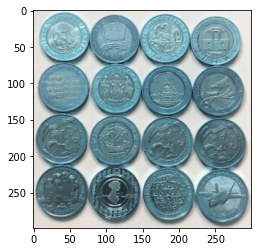

In [3]:
img=c.imread("coins.jpg")
plt.imshow(img)

# Gray Scale

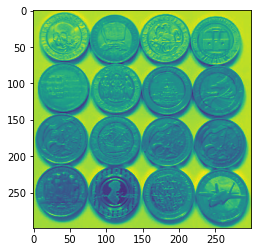

In [4]:
img1=c.cvtColor(img,c.COLOR_BGR2RGB)
gray=c.cvtColor(img1,c.COLOR_RGB2GRAY)
plt.imshow(gray)

# Thresholding 

In [5]:
#median=c.medianBlur(img,5)
#ret,ath1=c.adaptiveThreshold(gray,255,c.ADAPTIVE_THRESH_GAUSSIAN_C,c.THRESH_BINARY,11,2)

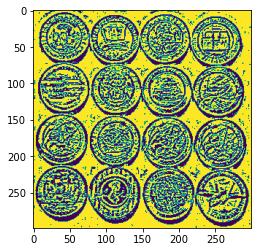

In [6]:
ath1=c.adaptiveThreshold(gray,255,c.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            c.THRESH_BINARY,11,2)
plt.imshow(ath1)

# erosion , dilation ,Noise removal

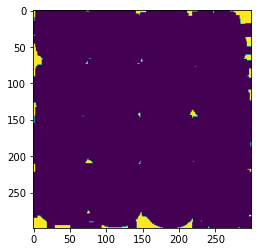

In [7]:
kernel=n.ones((3,3),n.uint8)
erosion=c.erode(ath1,kernel,iterations=5)
dilation=c.dilate(erosion,kernel,iterations=5)
plt.imshow(erosion)


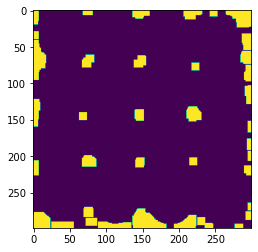

In [8]:
dilation=c.dilate(erosion,kernel,iterations=5)
plt.imshow(dilation)

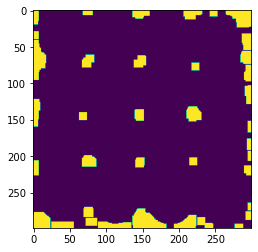

In [9]:
noise=c.morphologyEx(ath1,c.MORPH_OPEN,kernel,iterations=5)
plt.imshow(noise)

# sure bg

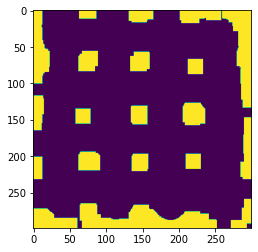

In [10]:
sure_bg=c.dilate(noise,kernel,iterations=5)
plt.imshow(sure_bg)

# sure_fg

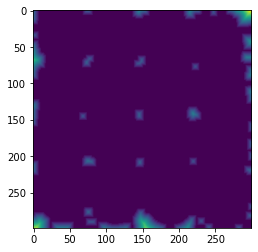

In [11]:
dis=c.distanceTransform(noise,c.DIST_L2,5)
ret,surefg=c.threshold(dis,0.7*dis.max(),255,0)
plt.imshow(dis)


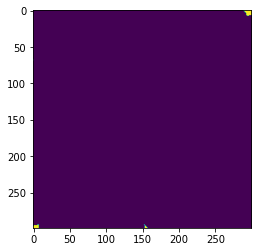

In [12]:
plt.imshow(surefg)

# Unknown region

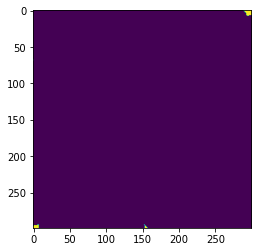

In [13]:
surefg=n.uint8(surefg)
unknown=c.subtract(sure_bg,surefg)
plt.imshow(surefg)

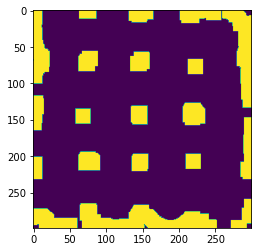

In [14]:
plt.imshow(unknown)

# Mark Labelling

[[1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 2 2 2]
 ...
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]]
[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]
 [4 4 4 ... 1 1 1]]


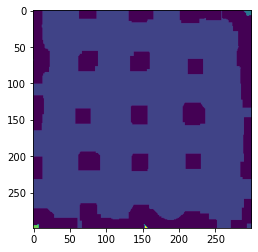

In [15]:
ret,markers=c.connectedComponents(surefg)
markers=markers+1
print(markers)
markers[unknown==255]=0
print(markers)
plt.imshow(markers)

# Watershed

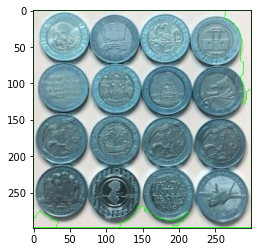

In [16]:
markers=c.watershed(img,markers)
img[markers==-1]=[0,255,0]
plt.imshow(img)
#c.imshow("img",img)

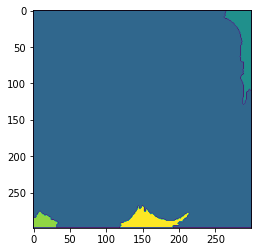

In [17]:
plt.imshow(markers)